# Santander Customer Transaction Prediction Dataset

At Santander, the mission is to help people and businesses prosper. We are always looking
for ways to help our customers understand their financial health and identify which
products and services might help them achieve their monetary goals.

Santander science team is continually challenging our machine learning algorithms,
working with the global data science community to make sure we can more accurately
identify new ways to solve our most common challenge, binary classification problems
such as: is a customer satisfied? Will a customer buy this product? Can a customer pay
this loan?

## The Challenge

Identify which customers will make a specific transaction in
the future, irrespective of the amount of money transacted.

## Conclusions

### Dataset
    
    - 2 outputs
        0 = No transaction
        1 = Transaction
    
    - 200 variables

### Data preprocessing

Dataset is un balance

    - 89.95% corresponds to target "0" and 10.04% corresponds to target "1".
    - We decided to downsampling target "0" data to better train our model, leaving the dataset as follow: 33.33% for target "0" and 66.66% for target "1".

Variables does show very low correlation among them, meaning that variables are independent. Variables while plotting them in box plots show outliers that mainly are coming from target "1" data.

Variables were passed through a Standard Scaler before fitting them into the model.

### Model

We chose to run a neuronal network with the following structure:

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   

=================================================================

dense (Dense)                (None, 100)               20100     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 202

=================================================================

Total params: 50,602
Trainable params: 50,602
Non-trainable params: 0

### Results

Accuracy

     - Train Data = 0.99
     - Test Data = 0.73

### Confusion Matrix

    0 1423 1143
    1  548 4423
        0   1

#### We can coclude that our model is beter for predicting target "1" outputs base on the data we used (Accuracy = 0.88) . It seems that it is not that good to classify target "0" outputs (Accuracy = 0.55).

_________________________________________________________________

In [1]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [2]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
from sklearn.utils import resample

## Read the Train CSV Dataset

In [4]:
df = pd.read_csv("train.csv")
df.head()

ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  
2  -6.5213   8.2675  14.7222   0.3965  
3  -2.9275  10.2922  17.9697  -8.9996  
4   3.9267   9.5031  17.9974  -8.8104  

[5 rows x 202 columns]

## Select the target and its corresponding variables to be analyzed

In [5]:
# Set features. This will also be used as your x values.
selected_features = df[['target','var_0','var_1','var_2','var_3','var_4','var_5','var_6','var_7','var_8','var_9','var_10','var_11','var_12','var_13','var_14','var_15','var_16','var_17','var_18','var_19','var_20','var_21','var_22','var_23','var_24','var_25','var_26','var_27','var_28','var_29','var_30','var_31','var_32','var_33','var_34','var_35','var_36','var_37','var_38','var_39','var_40','var_41','var_42','var_43','var_44','var_45','var_46','var_47','var_48','var_49','var_50','var_51','var_52','var_53','var_54','var_55','var_56','var_57','var_58','var_59','var_60','var_61','var_62','var_63','var_64','var_65','var_66','var_67','var_68','var_69','var_70','var_71','var_72','var_73','var_74','var_75','var_76','var_77','var_78','var_79','var_80','var_81','var_82','var_83','var_84','var_85','var_86','var_87','var_88','var_89','var_90','var_91','var_92','var_93','var_94','var_95','var_96','var_97','var_98','var_99','var_100','var_101','var_102','var_103','var_104','var_105','var_106','var_107','var_108','var_109','var_110','var_111','var_112','var_113','var_114','var_115','var_116','var_117','var_118','var_119','var_120','var_121','var_122','var_123','var_124','var_125','var_126','var_127','var_128','var_129','var_130','var_131','var_132','var_133','var_134','var_135','var_136','var_137','var_138','var_139','var_140','var_141','var_142','var_143','var_144','var_145','var_146','var_147','var_148','var_149','var_150','var_151','var_152','var_153','var_154','var_155','var_156','var_157','var_158','var_159','var_160','var_161','var_162','var_163','var_164','var_165','var_166','var_167','var_168','var_169','var_170','var_171','var_172','var_173','var_174','var_175','var_176','var_177','var_178','var_179','var_180','var_181','var_182','var_183','var_184','var_185','var_186','var_187','var_188','var_189','var_190','var_191','var_192','var_193','var_194','var_195','var_196','var_197','var_198','var_199']]
selected_features.head()

target    var_0   var_1    var_2   var_3    var_4   var_5   var_6    var_7  \
0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187  18.6266   
1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208  16.5338   
2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427  14.6155   
3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428  14.9250   
4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405  19.2514   

    var_8  ...  var_190  var_191  var_192  var_193  var_194  var_195  var_196  \
0 -4.9200  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   7.8784   
1  3.1468  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   8.1267   
2 -4.9193  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417  -6.5213   
3 -5.8609  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706  -2.9275   
4  6.2654  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   3.9267   

   var_197  var_198  var_199  
0   8.5635  12.7803  -1.0914  
1   8.7889  18.3560   1.9518  
2   8.2675  14.7222   0.3965  
3  10.2922  17.9697  -8.9996  
4   9.5031  17.9974  -8.8104  

[5 rows x 201 columns]

## Perform a descriptive statistic analysis of variables

In [6]:
selected_features.describe()

target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean       16.545850       0.284162  ...       3.234440       7.438408   
std         3.418076       3.332634  ...       4.559922       3.023272   
min         5.349700     -10.505500  ...     -14.093300      -2.691700   
25%        13.943800      -2.317800  ...      -0.058825       5.157400   
50%        16.456800       0.393700  ...       3.203600       7.347750   
75%        19.102900       2.937900  ...       6.406200       9.512525   
max        27.691800      10.151300  ...      18.440900      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.927839       3.331774      17.993784      -0.142088   
std         1.478423       3.992030       3.135162       1.429372   
min        -3.814500     -11.783400       8.694400      -5.261000   
25%         0.889775       0.584600      15.629800      -1.170700   
50%         1.901300       3.396350      17.957950      -0.172700   
75%         2.949500       6.205800      20.396525       0.829600   
max         8.402400      18.281800      27.928800       4.272900   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.303335       8.908158      15.870720      -3.326537  
std         5.454369       0.921625       3.010945      10.438015  
min       -14.209600       5.960600       6.299300     -38.852800  
25%        -1.946925       8.252800      13.829700     -11.208475  
50%         2.408900       8.888200      15.934050      -2.819550  
75%         6.556725       9.593300      18.064725       4.836800  
max        18.321500      12.000400      26.079100      28.500700  

[8 rows x 201 columns]

## Perform a data integrity analysis

- Look for null values
- Look for na values

No nulll or na cells were found.

In [7]:
selected_features.isnull().sum()

target     0
var_0      0
var_1      0
var_2      0
var_3      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 201, dtype: int64

In [8]:
selected_features.isna().sum()

target     0
var_0      0
var_1      0
var_2      0
var_3      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 201, dtype: int64

## Analyzing the variable data distribution

- Create a box & whisker chart to look for data distribution and potential outliers
    - It is observed that most of the variables present outlier data

<AxesSubplot:>

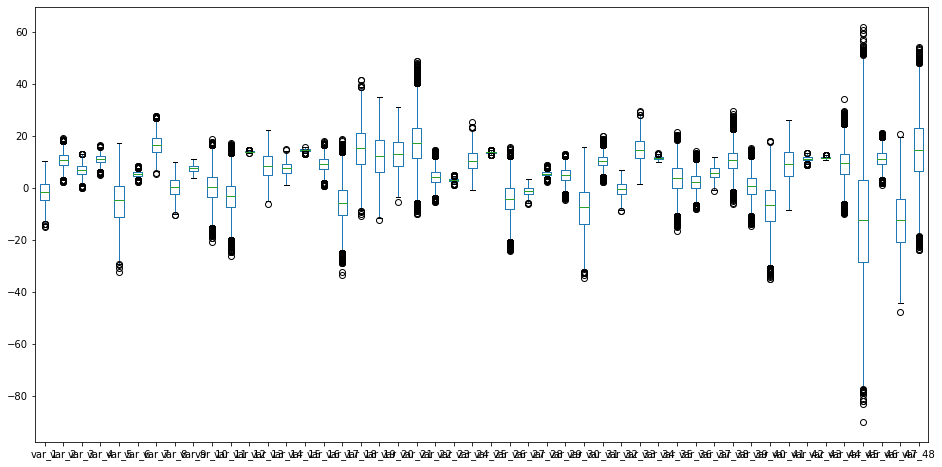

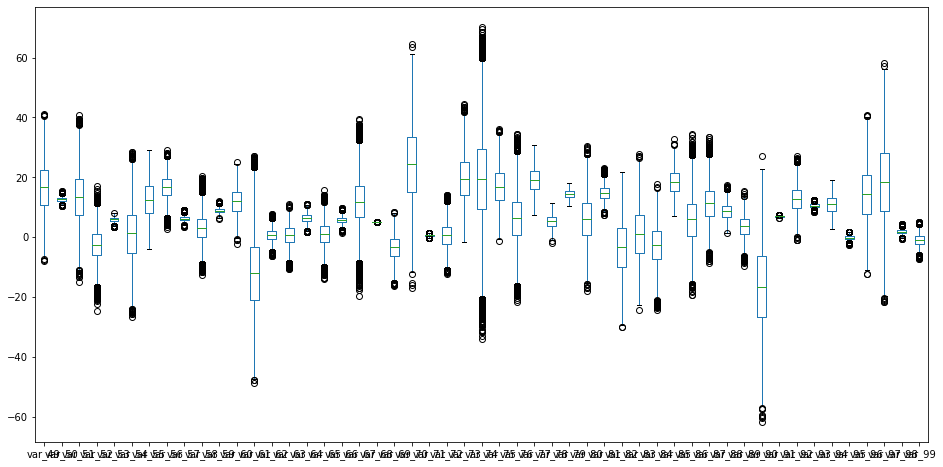

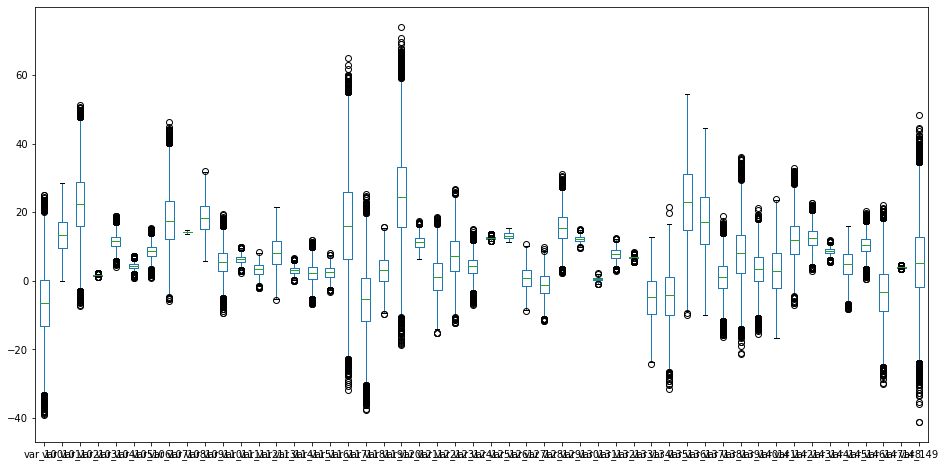

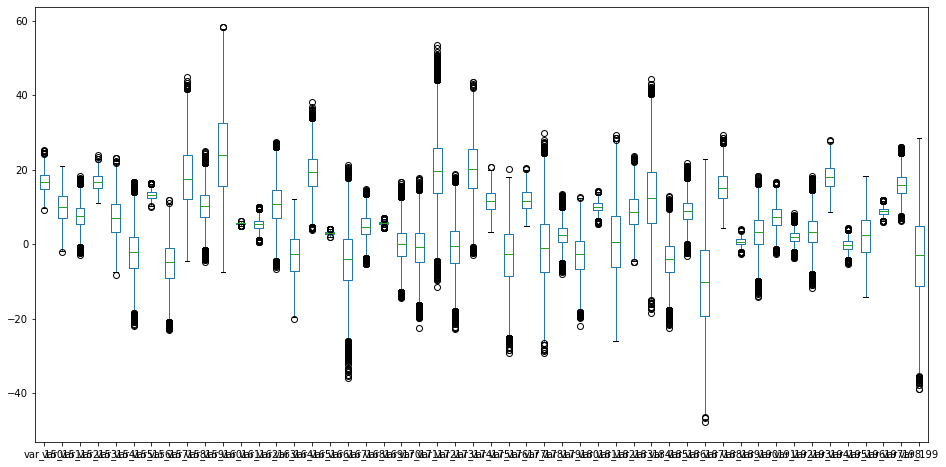

In [9]:
# Boxplot Analysis
# Plot  features.
selected_features.iloc[:, 2:50].plot(kind='box', figsize=[16,8])
selected_features.iloc[:, 50:101].plot(kind='box', figsize=[16,8])
selected_features.iloc[:, 101:151].plot(kind='box', figsize=[16,8])
selected_features.iloc[:, 151:].plot(kind='box', figsize=[16,8])

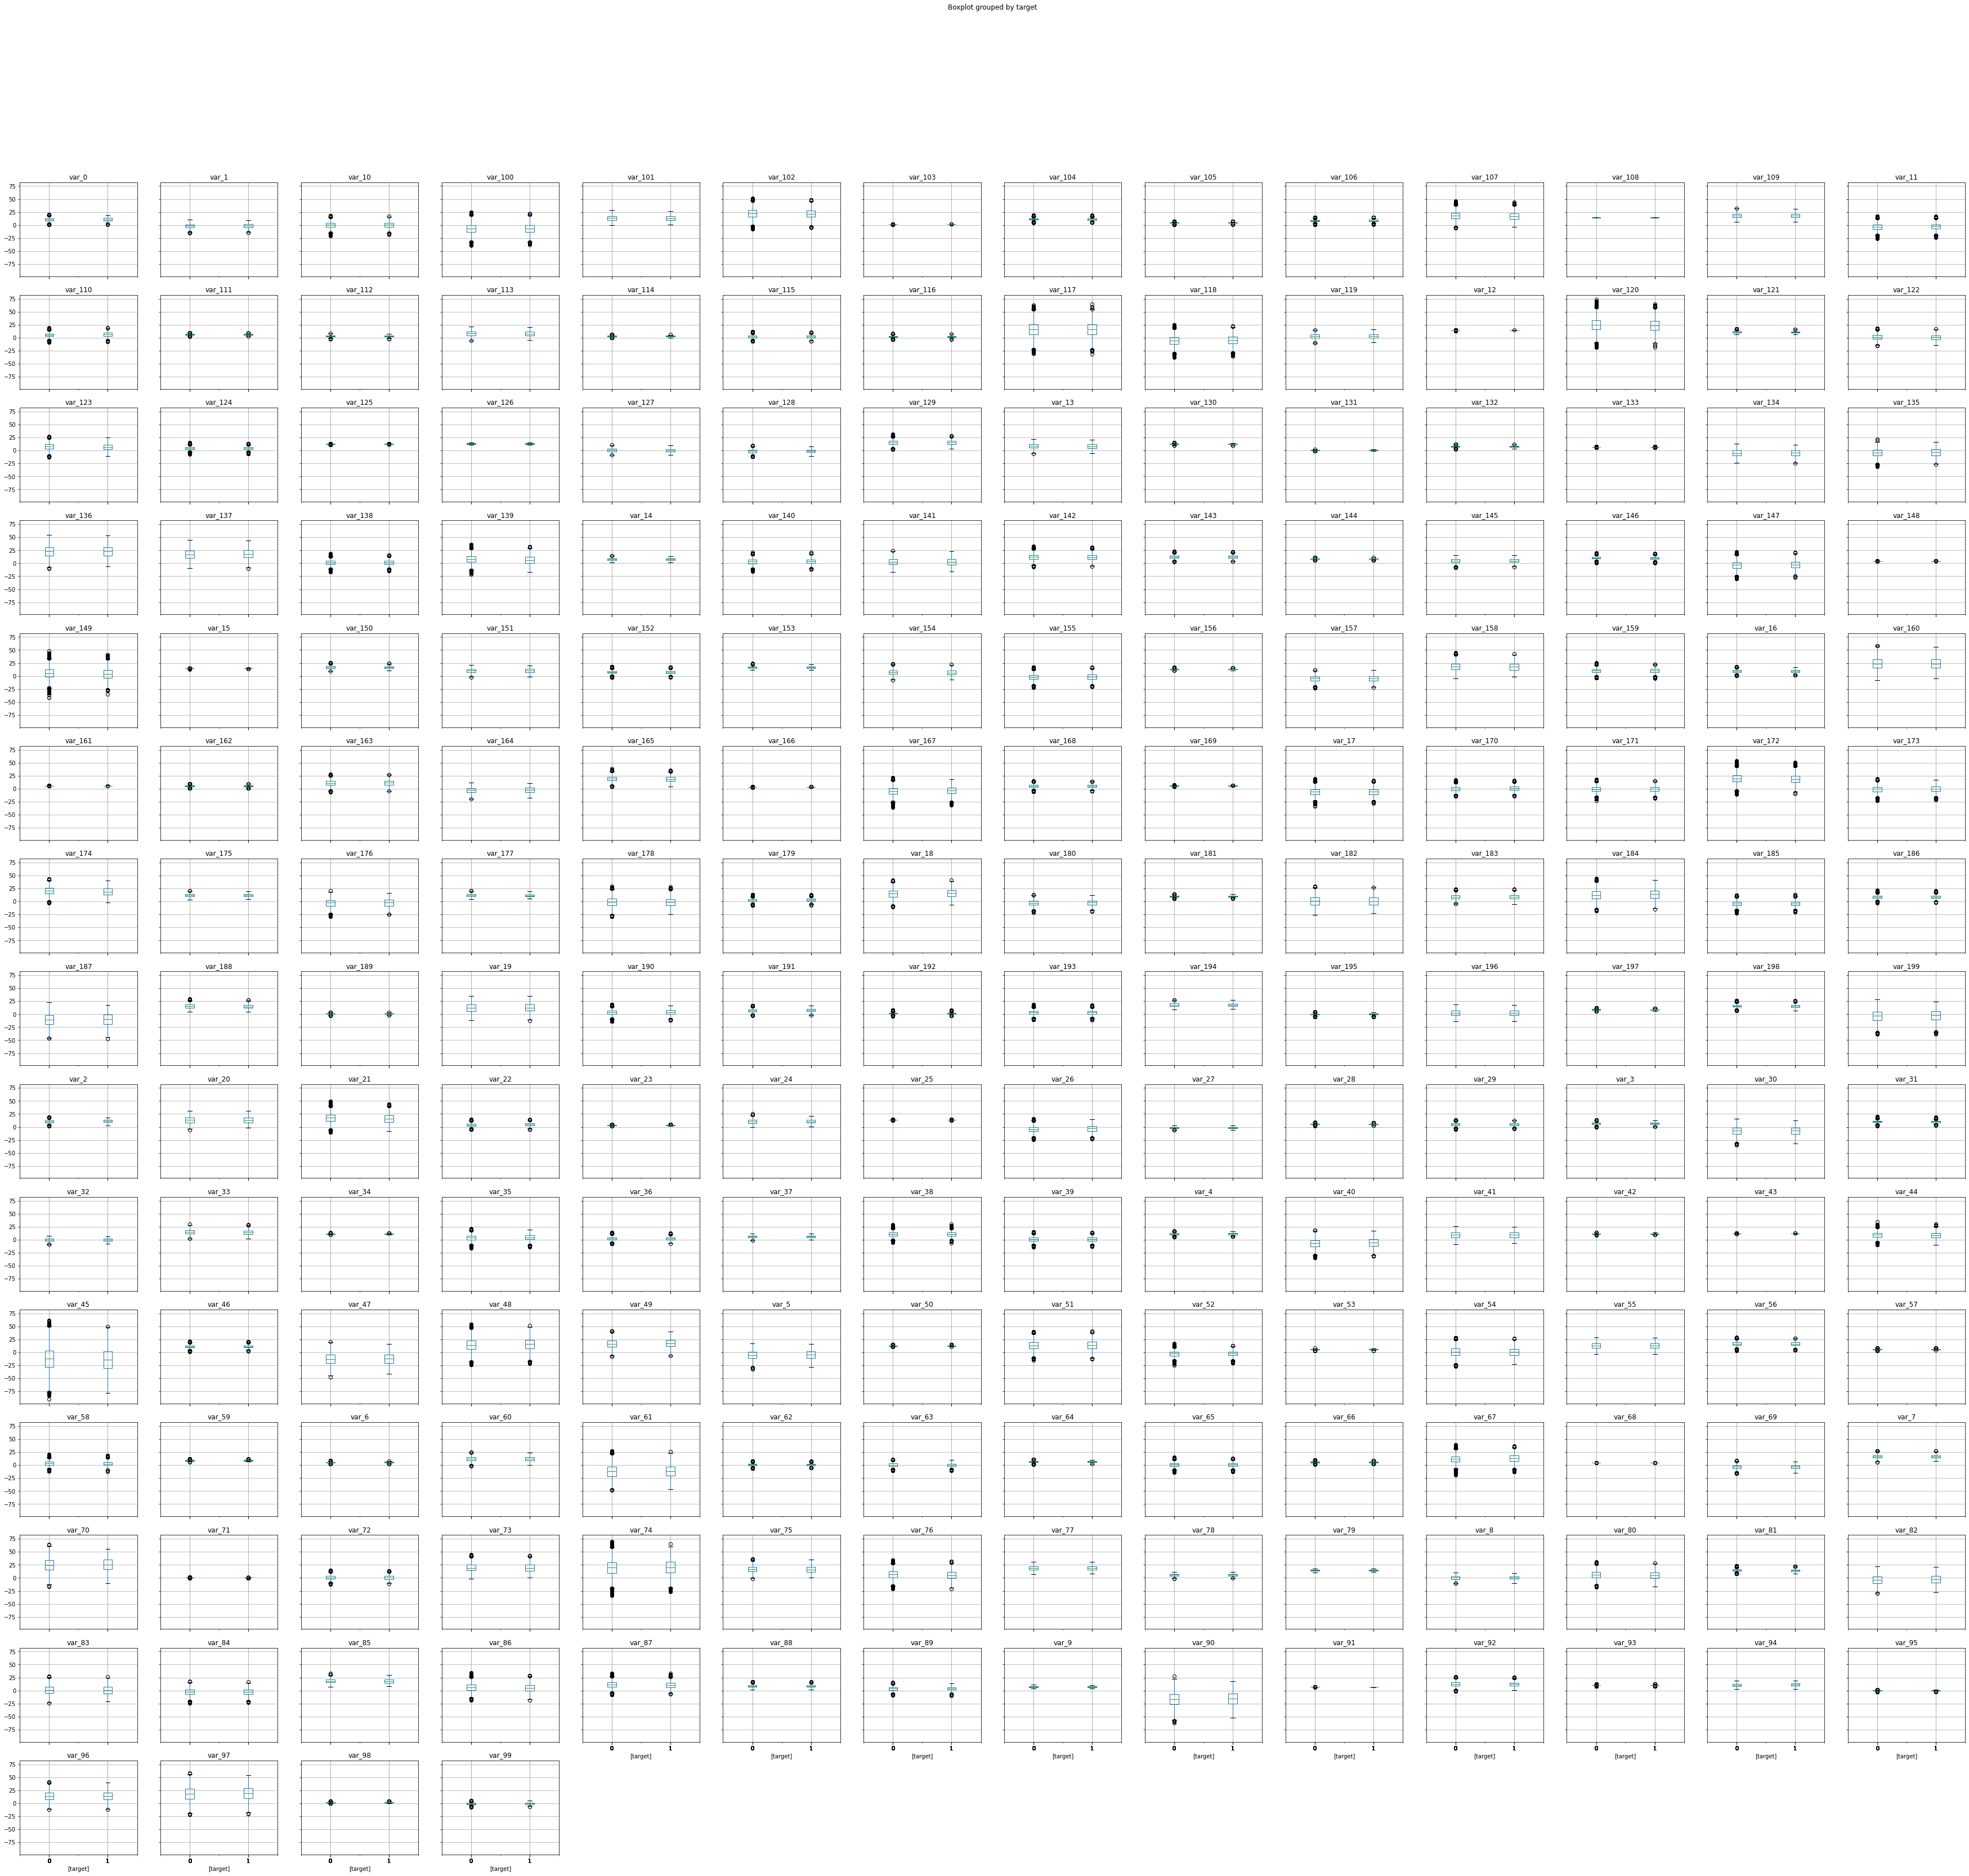

In [10]:
selected_features.boxplot(by='target', figsize=(60,55))
plt.show()

## Perform a correlation analysis

- Per the results of the correlation analysis, we can conclude that variables show very poor correlation, meaning that the variables are indepent to each other. Therefore, we should not ignore direclty any variable or drop it in feature selection preocess.

- Highest correlated variables:

        Variable   Correlation
        var_81     0.080917
        var_139    0.074080
        var_12     0.069489
        var_6      0.066731
        var_110    0.064275

In [11]:
corr = selected_features.corr()
corr.style.background_gradient(cmap='coolwarm')

In [12]:
def get_redundant_pairs(selected_features):
    pairs_to_drop = set()
    cols = selected_features.columns
    for i in range(0, selected_features.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop


def get_top_abs_correlations(selected_features, n=5):
    au_corr = selected_features.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(selected_features)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [13]:
top_corr = get_top_abs_correlations(selected_features, 200)
top_corr.head(10)

target  var_81     0.080917
        var_139    0.074080
        var_12     0.069489
        var_6      0.066731
        var_110    0.064275
        var_146    0.063644
        var_53     0.063399
        var_26     0.062422
        var_76     0.061917
        var_174    0.061669
dtype: float64

<AxesSubplot:>

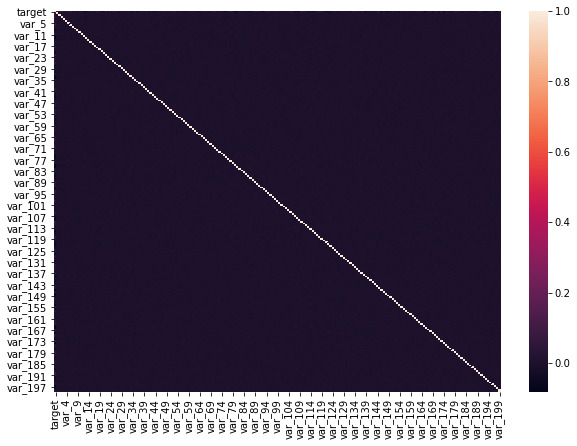

In [14]:
plt.figure(figsize=(10, 7))
sns.heatmap(selected_features.corr())

## Perform a skewness analysis

- The maximum skewness value is 0.34 which is in the range from -0.5 to 0.5, this means it is almost symmetrical.
- Highest scores:

            colName  Skewness
        0   var_44  0.340172
        1  var_168  0.267414
        2    var_2  0.260313
        3  var_179  0.242891
        4   var_93  0.238091
        5    var_0  0.235639
        6  var_163  0.234780
        7   var_81  0.232526
        8   var_80  0.220236
        9   var_86  0.216859


In [15]:
skewList = []
for colName in df.columns:
    if colName not in ['ID_code', 'target']:
        skewList.append([colName, abs(df[colName].skew())])

skewList.sort(key=lambda x: x[1], reverse=True)

skewdf = pd.DataFrame.from_records(skewList, columns=['colName', 'Skewness'])

print(skewdf.head(10))


   colName  Skewness
0   var_44  0.340172
1  var_168  0.267414
2    var_2  0.260313
3  var_179  0.242891
4   var_93  0.238091
5    var_0  0.235639
6  var_163  0.234780
7   var_81  0.232526
8   var_80  0.220236
9   var_86  0.216859


## Dataset balance check

- Per the charts, it is observed that the dataset is unbalaced
- It is recommended to performa a downsampling to balace the dataset

/Users/dianaestrada/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


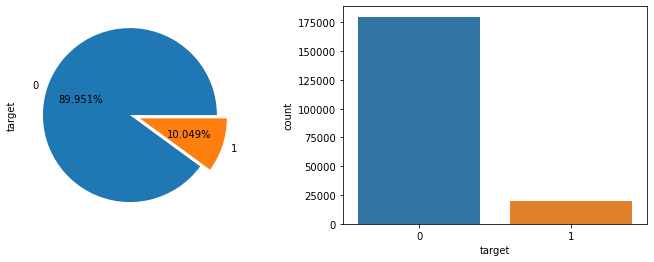

In [16]:
f,ax=plt.subplots(1,2, figsize=(12,4))
selected_features.target.value_counts().plot.pie(explode=[0,0.12],autopct='%1.3f%%',ax=ax[0])
sns.countplot('target',data=selected_features)
plt.show()

## Perform a downsampling to balance the data set
- Downsample the 0 target samples to represent the 20% of the dataset
- Leave the 1 target sample as is. This will help the model to learn those cases where the client will perform a transaction

In [17]:
majority_df = selected_features[selected_features.target==0]
majority_df.head()

target    var_0   var_1    var_2   var_3    var_4   var_5   var_6    var_7  \
0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187  18.6266   
1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208  16.5338   
2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427  14.6155   
3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428  14.9250   
4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405  19.2514   

    var_8  ...  var_190  var_191  var_192  var_193  var_194  var_195  var_196  \
0 -4.9200  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   7.8784   
1  3.1468  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   8.1267   
2 -4.9193  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417  -6.5213   
3 -5.8609  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706  -2.9275   
4  6.2654  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   3.9267   

   var_197  var_198  var_199  
0   8.5635  12.7803  -1.0914  
1   8.7889  18.3560   1.9518  
2   8.2675  14.7222   0.3965  
3  10.2922  17.9697  -8.9996  
4   9.5031  17.9974  -8.8104  

[5 rows x 201 columns]

In [18]:
majority_df.shape

(179902, 201)

In [19]:
minority_df = selected_features[selected_features.target==1]
minority_df.head()

target    var_0   var_1    var_2   var_3    var_4    var_5   var_6  \
13       1  16.3699  1.5934  16.7395  7.3330  12.1450   5.9004  4.8222   
29       1   5.3301 -2.6064  13.1913  3.1193   6.6483  -6.5659  5.9064   
63       1   7.7072  0.0183   9.9974  8.3524   9.2886 -13.3627  6.0425   
65       1  10.5358 -2.5439   8.7394  6.7548  14.4099  -3.8724  5.1584   
71       1   6.7547  2.5973  14.2141  8.3514   7.4942  -1.3055  4.2336   

      var_7   var_8  ...  var_190  var_191  var_192  var_193  var_194  \
13  20.9729  1.1064  ...   7.4002   7.4031   4.3989   4.0978  17.3638   
29  15.2341  1.2915  ...   5.9215   7.9676   2.3405   1.1482  23.2168   
63  10.1108  1.3999  ...   1.5832   5.0039   3.8814   7.4241  21.4844   
65  15.8381  5.8204  ...   4.6648   6.4227   3.4025  -4.0882  14.1174   
71  15.0243 -1.8922  ...   1.4677   3.5935   2.0013   1.5777  18.2820   

    var_195  var_196  var_197  var_198  var_199  
13  -1.3022   9.6846   9.0419  15.6064 -10.8529  
29  -2.0105   3.7600   9.4513  17.4105 -14.6897  
63  -0.8297  -3.0468   7.5790  15.7685   5.4769  
65  -0.2472   5.3847   8.6949  15.1340   3.8449  
71  -4.3408   6.8869   9.3567  18.9013  13.3447  

[5 rows x 201 columns]

In [20]:
minority_df.shape

(20098, 201)

In [21]:
df_majority_downsampled = resample(majority_df,
                                   replace=False,
                                   n_samples=10049,
                                   random_state=123)
df_majority_downsampled.head()

target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
102962       0  10.5515  2.9919   9.6239  4.1906  11.8361 -4.9910  7.2958   
180442       0   8.0935 -1.0890  12.0626  6.3985  10.3884 -9.3180  5.6301   
62366        0   7.5042 -5.3314   8.2787  7.5809  10.4950  0.7379  4.5021   
130392       0  13.6041  2.2360  15.6814  5.3755  11.2307 -3.9767  4.9260   
6212         0  11.2516  0.1632  12.4224  8.7903  11.7239  4.4622  5.9778   

          var_7   var_8  ...  var_190  var_191  var_192  var_193  var_194  \
102962  11.1773  4.6778  ...   7.3952  14.3591   0.7398   0.8391  24.8805   
180442  14.0953 -4.3619  ...   4.3773   5.3134   3.7662   5.0077  20.8711   
62366   14.2104 -1.5635  ...  -2.0329  11.1906   0.9092   0.4259  20.7207   
130392  21.9209  0.2097  ...   5.5903   3.0440  -0.5547   0.2652  16.8571   
6212    13.3176  4.2301  ...   7.1417   9.2410  -0.7223   2.8775  14.8037   

        var_195  var_196  var_197  var_198  var_199  
102962  -0.7475  -1.9077  10.2265  11.9060   6.1384  
180442   3.1391   8.1951  10.0551   8.6872   6.2766  
62366   -1.0286   3.0545   9.3808  17.7959   0.0426  
130392  -1.9691   8.3485   9.1658  13.5859   3.7795  
6212    -1.5576  -4.4607   8.3518  12.7517 -13.9047  

[5 rows x 201 columns]

In [22]:
df_majority_downsampled.shape

(10049, 201)

In [23]:
selected_features1 = pd.concat([df_majority_downsampled, minority_df])
selected_features1.head()

target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
102962       0  10.5515  2.9919   9.6239  4.1906  11.8361 -4.9910  7.2958   
180442       0   8.0935 -1.0890  12.0626  6.3985  10.3884 -9.3180  5.6301   
62366        0   7.5042 -5.3314   8.2787  7.5809  10.4950  0.7379  4.5021   
130392       0  13.6041  2.2360  15.6814  5.3755  11.2307 -3.9767  4.9260   
6212         0  11.2516  0.1632  12.4224  8.7903  11.7239  4.4622  5.9778   

          var_7   var_8  ...  var_190  var_191  var_192  var_193  var_194  \
102962  11.1773  4.6778  ...   7.3952  14.3591   0.7398   0.8391  24.8805   
180442  14.0953 -4.3619  ...   4.3773   5.3134   3.7662   5.0077  20.8711   
62366   14.2104 -1.5635  ...  -2.0329  11.1906   0.9092   0.4259  20.7207   
130392  21.9209  0.2097  ...   5.5903   3.0440  -0.5547   0.2652  16.8571   
6212    13.3176  4.2301  ...   7.1417   9.2410  -0.7223   2.8775  14.8037   

        var_195  var_196  var_197  var_198  var_199  
102962  -0.7475  -1.9077  10.2265  11.9060   6.1384  
180442   3.1391   8.1951  10.0551   8.6872   6.2766  
62366   -1.0286   3.0545   9.3808  17.7959   0.0426  
130392  -1.9691   8.3485   9.1658  13.5859   3.7795  
6212    -1.5576  -4.4607   8.3518  12.7517 -13.9047  

[5 rows x 201 columns]

In [24]:
selected_features1.shape

(30147, 201)

/Users/dianaestrada/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


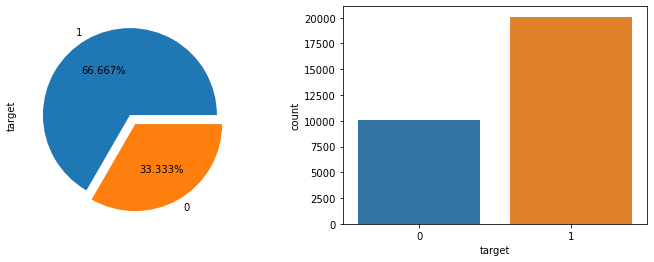

In [25]:
f,ax=plt.subplots(1,2, figsize=(12,4))
selected_features1.target.value_counts().plot.pie(explode=[0,0.12],autopct='%1.3f%%',ax=ax[0])
sns.countplot('target',data=selected_features1)
plt.show()

In [26]:
# Assign X (data) and y (target)
X = selected_features1.drop("target", axis=1)
y = selected_features1["target"]
print(X.shape, y.shape)

(30147, 200) (30147,)


## Use train_test_split to create training and testing data

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Review Test Data Balance - y_test
- Per the results below, the test data is similar in balance as the base data.

    - Base data    
        - 0 = 33.33%
        - 1 = 66.66%

    - Test data    
        - 0 = 34.04%
        - 1 = 65.95%

In [28]:
y_test.value_counts()

1    4971
0    2566
Name: target, dtype: int64

<AxesSubplot:ylabel='target'>

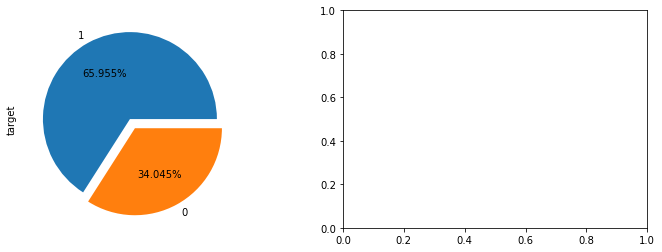

In [29]:
f,ax=plt.subplots(1,2, figsize=(12,4))
y_test.value_counts().plot.pie(explode=[0,0.12],autopct='%1.3f%%',ax=ax[0])
#sns.countplot('target',data=y_test)
#plt.show()

## Data Preprocessing

It is really important to scale our data before using multilayer perceptron models. 

Without scaling, it is often difficult for the training cycle to converge

In [30]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

Remember to scale both the training and testing data

In [31]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

One-hot encode the labels

In [32]:
from tensorflow.keras.utils import to_categorical

In [33]:
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

## Creating our Model

We must first decide what kind of model to apply to our data

- For numerical data, we use a regressor model
- For categorical data, we use a classifier model

In this case we will use a neuronal network as our classifier model

## Defining our Model Architecture (the layers)

We first need to create a sequential model

In [34]:
from tensorflow.keras.models import Sequential

model = Sequential()

Next, we add our first layer. This layer requires you to specify both the number of inputs and the number of nodes that you want in the hidden layer.

Then you create extra layers to perform additional iterations, in these layers you need to specify the number of nodes to use

In [35]:
from tensorflow.keras.layers import Dense
number_inputs = 200
number_hidden_nodes = 100
model.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=number_inputs))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))

Our final layer is the output layer. Here, we need to specify the activation function (typically `softmax` for classification) and the number of classes (labels) that we are trying to predict (2 in this challenge).

In [36]:
number_classes = 2
model.add(Dense(units=number_classes, activation='sigmoid'))

## Model Summary
Here we can see a representation of our sequential neuronal network

- 1st Layer - Input (200 inputs)
- 2nd Layer - Hidden Layer (100 nodes)
- 3rd Layer - Hidden Layer (100 nodes)
- 4th Layer - Hidden Layer (100 nodes)
- 5th Layer - Hidden Layer (100 nodes)
- 6th Layer - Output (2 classes)


In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               20100     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 202       
Total params: 50,602
Trainable params: 50,602
Non-trainable params: 0
_________________________________________________________________


## Compile the Model

Now that we have our model architecture defined, we must compile the model using a loss function and optimizer. We can also specify additional training metrics such as accuracy.

In [38]:
# Use categorical crossentropy for categorical data and mean squared error for regression
# Hint: your output layer in this example is using software for logistic regression (categorical)
# If your output layer activation was `linear` then you may want to use `mse` for loss
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training the Model
Finally, we train our model using our training data

Training consists of updating our weights using our optimizer and loss function. In this example, we choose 50 iterations (loops) of training that are called epochs.

We also choose to shuffle our training data and increase the detail printed out during each training cycle.

In [39]:
# Fit (train) the model
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=50,
    shuffle=True,
    verbose=2
)

Train on 22610 samples
Epoch 1/50
22610/22610 - 6s - loss: 0.4756 - accuracy: 0.7682
Epoch 2/50
22610/22610 - 2s - loss: 0.4117 - accuracy: 0.8100
Epoch 3/50
22610/22610 - 2s - loss: 0.3766 - accuracy: 0.8285
Epoch 4/50
22610/22610 - 2s - loss: 0.3279 - accuracy: 0.8552
Epoch 5/50
22610/22610 - 2s - loss: 0.2670 - accuracy: 0.8873
Epoch 6/50
22610/22610 - 2s - loss: 0.2078 - accuracy: 0.9136
Epoch 7/50
22610/22610 - 2s - loss: 0.1633 - accuracy: 0.9351
Epoch 8/50
22610/22610 - 2s - loss: 0.1222 - accuracy: 0.9526
Epoch 9/50
22610/22610 - 2s - loss: 0.1006 - accuracy: 0.9611
Epoch 10/50
22610/22610 - 2s - loss: 0.0801 - accuracy: 0.9697
Epoch 11/50
22610/22610 - 2s - loss: 0.0723 - accuracy: 0.9731
Epoch 12/50
22610/22610 - 2s - loss: 0.0600 - accuracy: 0.9781
Epoch 13/50
22610/22610 - 2s - loss: 0.0599 - accuracy: 0.9769
Epoch 14/50
22610/22610 - 2s - loss: 0.0524 - accuracy: 0.9808
Epoch 15/50
22610/22610 - 2s - loss: 0.0448 - accuracy: 0.9839
Epoch 16/50
22610/22610 - 2s - loss: 0.05

## Quantifying the Model
We use our testing data to validate our model. This is how we determine the validity of our model (i.e. the ability to predict new and previously unseen data points)

#### Training Data Results

In [40]:
# Evaluate the model using the train data
model_loss, model_accuracy = model.evaluate(
    X_train_scaled, y_train_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


22610/1 - 1s - loss: 0.0107 - accuracy: 0.9950
Loss: 0.015312941448997749, Accuracy: 0.9950022101402283


#### Test Data Results

In [41]:
# Evaluate the model using the testing data
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


7537/1 - 0s - loss: 2.0168 - accuracy: 0.7402
Loss: 2.1004787100647304, Accuracy: 0.7402149438858032


## Confusion Matrix

To explain better how accurate our modes is we performed a confusion matrix to see how the model is evaluating the different inputs that were given.

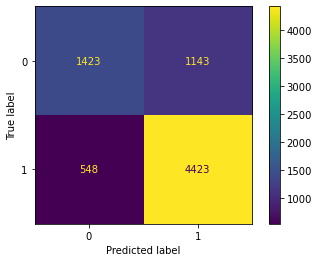

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC

clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)

y_pred =clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

## Saving the Model
We can save our model using the HDF5 binary format with the extension `.h5`

In [43]:
# Save the model
model.save("neuronal_network_06.h5")

## Load the model

Load our model to use it with un-evaluated data to predict the target

    - 0 = No Transaction
    - 1 = Transaction

In [44]:
# Load the model
from tensorflow.keras.models import load_model
model = load_model("neuronal_network_06.h5")

## Predicting the outcome

In [45]:
df = pd.read_csv("test.csv")
df.head()

ID_code    var_0    var_1    var_2   var_3    var_4   var_5   var_6  \
0  test_0  11.0656   7.7798  12.9536  9.4292  11.4327 -2.3805  5.8493   
1  test_1   8.5304   1.2543  11.3047  5.1858   9.1974 -4.0117  6.0196   
2  test_2   5.4827 -10.3581  10.1407  7.0479  10.2628  9.8052  4.8950   
3  test_3   8.5374  -1.3222  12.0220  6.5749   8.8458  3.1744  4.9397   
4  test_4  11.7058  -0.1327  14.1295  7.7506   9.1035 -8.5848  6.8595   

     var_7   var_8  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.2675  2.1337  ...  -2.1556  11.8495  -1.4300   2.4508  13.7112   2.4669   
1  18.6316 -4.4131  ...  10.6165   8.8349   0.9403  10.1282  15.5765   0.4773   
2  20.2537  1.5233  ...  -0.7484  10.9935   1.9803   2.1800  12.9813   2.1281   
3  20.5660  3.3755  ...   9.5702   9.0766   1.6580   3.5813  15.1874   3.1656   
4  10.6048  2.9890  ...   4.2259   9.1723   1.2835   3.3778  19.5542  -0.2860   

   var_196  var_197  var_198  var_199  
0   4.3654  10.7200  15.4722  -8.7197  
1  -1.4852   9.8714  19.1293 -20.9760  
2  -7.1086   7.0618  19.8956 -23.1794  
3   3.9567   9.2295  13.0168  -4.2108  
4  -5.1612   7.2882  13.9260  -9.1846  

[5 rows x 201 columns]

In [46]:
# Set features. This will also be used as your x values.
test = df[['var_0','var_1','var_2','var_3','var_4','var_5','var_6','var_7','var_8','var_9','var_10','var_11','var_12','var_13','var_14','var_15','var_16','var_17','var_18','var_19','var_20','var_21','var_22','var_23','var_24','var_25','var_26','var_27','var_28','var_29','var_30','var_31','var_32','var_33','var_34','var_35','var_36','var_37','var_38','var_39','var_40','var_41','var_42','var_43','var_44','var_45','var_46','var_47','var_48','var_49','var_50','var_51','var_52','var_53','var_54','var_55','var_56','var_57','var_58','var_59','var_60','var_61','var_62','var_63','var_64','var_65','var_66','var_67','var_68','var_69','var_70','var_71','var_72','var_73','var_74','var_75','var_76','var_77','var_78','var_79','var_80','var_81','var_82','var_83','var_84','var_85','var_86','var_87','var_88','var_89','var_90','var_91','var_92','var_93','var_94','var_95','var_96','var_97','var_98','var_99','var_100','var_101','var_102','var_103','var_104','var_105','var_106','var_107','var_108','var_109','var_110','var_111','var_112','var_113','var_114','var_115','var_116','var_117','var_118','var_119','var_120','var_121','var_122','var_123','var_124','var_125','var_126','var_127','var_128','var_129','var_130','var_131','var_132','var_133','var_134','var_135','var_136','var_137','var_138','var_139','var_140','var_141','var_142','var_143','var_144','var_145','var_146','var_147','var_148','var_149','var_150','var_151','var_152','var_153','var_154','var_155','var_156','var_157','var_158','var_159','var_160','var_161','var_162','var_163','var_164','var_165','var_166','var_167','var_168','var_169','var_170','var_171','var_172','var_173','var_174','var_175','var_176','var_177','var_178','var_179','var_180','var_181','var_182','var_183','var_184','var_185','var_186','var_187','var_188','var_189','var_190','var_191','var_192','var_193','var_194','var_195','var_196','var_197','var_198','var_199']]
test.head()

var_0    var_1    var_2   var_3    var_4   var_5   var_6    var_7  \
0  11.0656   7.7798  12.9536  9.4292  11.4327 -2.3805  5.8493  18.2675   
1   8.5304   1.2543  11.3047  5.1858   9.1974 -4.0117  6.0196  18.6316   
2   5.4827 -10.3581  10.1407  7.0479  10.2628  9.8052  4.8950  20.2537   
3   8.5374  -1.3222  12.0220  6.5749   8.8458  3.1744  4.9397  20.5660   
4  11.7058  -0.1327  14.1295  7.7506   9.1035 -8.5848  6.8595  10.6048   

    var_8   var_9  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  2.1337  8.8100  ...  -2.1556  11.8495  -1.4300   2.4508  13.7112   2.4669   
1 -4.4131  5.9739  ...  10.6165   8.8349   0.9403  10.1282  15.5765   0.4773   
2  1.5233  8.3442  ...  -0.7484  10.9935   1.9803   2.1800  12.9813   2.1281   
3  3.3755  7.4578  ...   9.5702   9.0766   1.6580   3.5813  15.1874   3.1656   
4  2.9890  7.1437  ...   4.2259   9.1723   1.2835   3.3778  19.5542  -0.2860   

   var_196  var_197  var_198  var_199  
0   4.3654  10.7200  15.4722  -8.7197  
1  -1.4852   9.8714  19.1293 -20.9760  
2  -7.1086   7.0618  19.8956 -23.1794  
3   3.9567   9.2295  13.0168  -4.2108  
4  -5.1612   7.2882  13.9260  -9.1846  

[5 rows x 200 columns]

### Prediction Results

In [47]:
# Make a prediction.
print(f"Predicted class: {model.predict_classes(test)}")

Predicted class: [1 1 1 ... 0 0 1]


In [48]:
df2 = model.predict_classes(test)
Predictions = pd.DataFrame(df2)
Predictions = Predictions.rename(columns = {0:"Target"})
Predictions.head()

Target
0       1
1       1
2       1
3       0
4       1